In [1]:
import napari
from napari_assistant._gui._Assistant import Assistant
from skimage.io import imread
from napari_assistant._categories import CATEGORIES
from napari_assistant._workflow_io_utility import initialise_root_functions, load_remaining_workflow
from napari_assistant._undo_redo import delete_workflow_widgets_layers
from napari_workflows import WorkflowManager

filename = 'C:/Users/ryans/OneDrive/Desktop/blobs.tif'
blobs = imread(filename)
blobs_modified = imread('C:/Users/ryans/OneDrive/Desktop/blobs_messed_up.tiff') 

viewer = napari.Viewer()
viewer.add_image(blobs_modified, name = 'not blobs')
viewer.add_image(blobs, name = 'blobs')

manager = WorkflowManager.install(viewer)
assistant = Assistant(viewer)
viewer.window.add_dock_widget(assistant)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


2022-05-10 11:15:51.139 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-05-10 11:15:51.276 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)}

undo tasks:
 {}



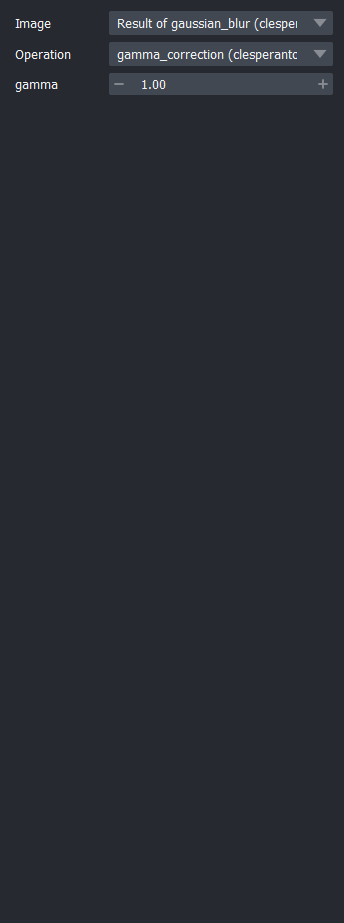

In [2]:
noise_widget = assistant._activate(CATEGORIES.get("Remove noise"))
assistant._activate(CATEGORIES.get("Filter"))

In [3]:
controller = manager.undo_redo_controller
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)



In [4]:
noise_widget["x"].value = 4

2022-05-10 11:15:51.786 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-05-10 11:15:51.802 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)}

new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}



In [5]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [6]:
noise_widget["x"].value = 8
for i in controller.undo_stack:
    print(i)

2022-05-10 11:15:51.898 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-05-10 11:15:51.918 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0), 'Result of

In [7]:
noise_widget["x"].value = 9
for i in controller.undo_stack:
    print(i)

2022-05-10 11:15:51.968 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-05-10 11:15:51.986 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 8.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

new tasks:
  {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 8.0, 1.0, 0.0), 'Result of gamma_correction (clesperanto)': (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)}

undo tasks:
 {'Result of gaussian_blur (clesperanto)': (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 8.0, 1.0, 0.0), 'Result of

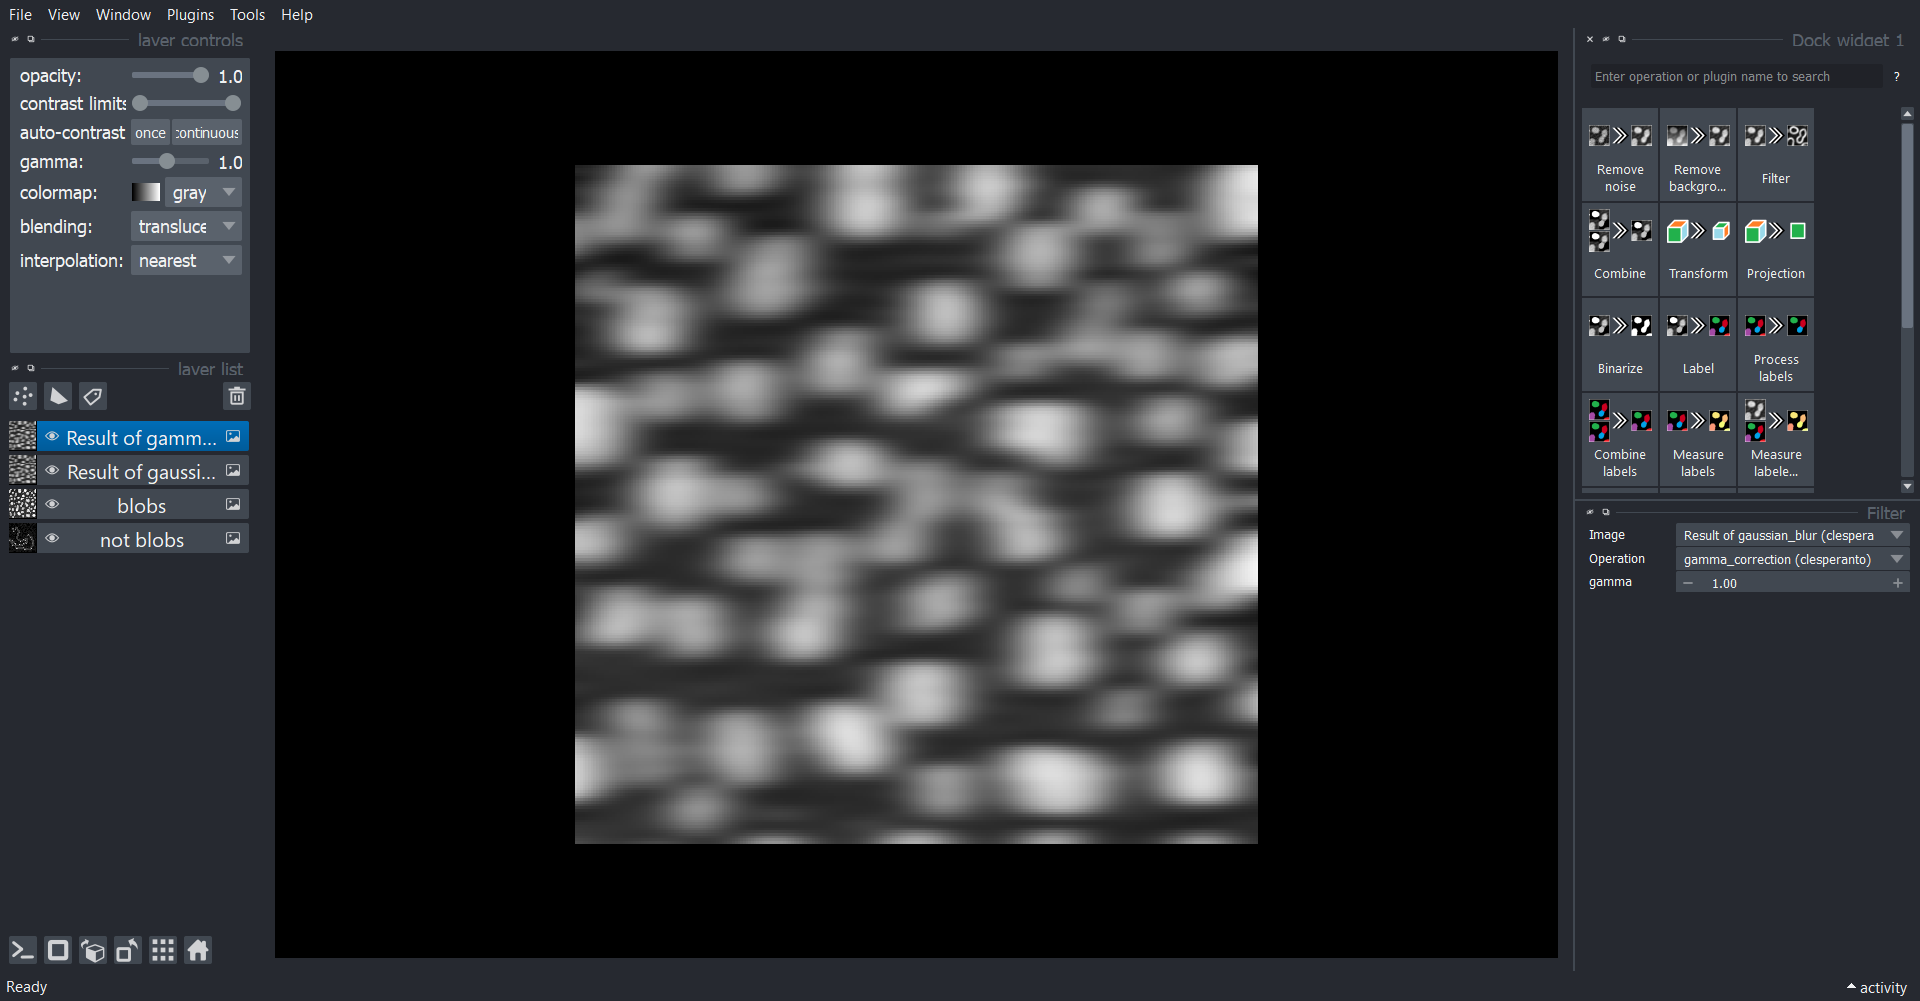

In [8]:
napari.utils.nbscreenshot(viewer)

In [9]:
assistant.undo_action()
for i in controller.undo_stack:
    print(i)
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-05-10 11:15:52.879 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-05-10 11:15:52.895 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



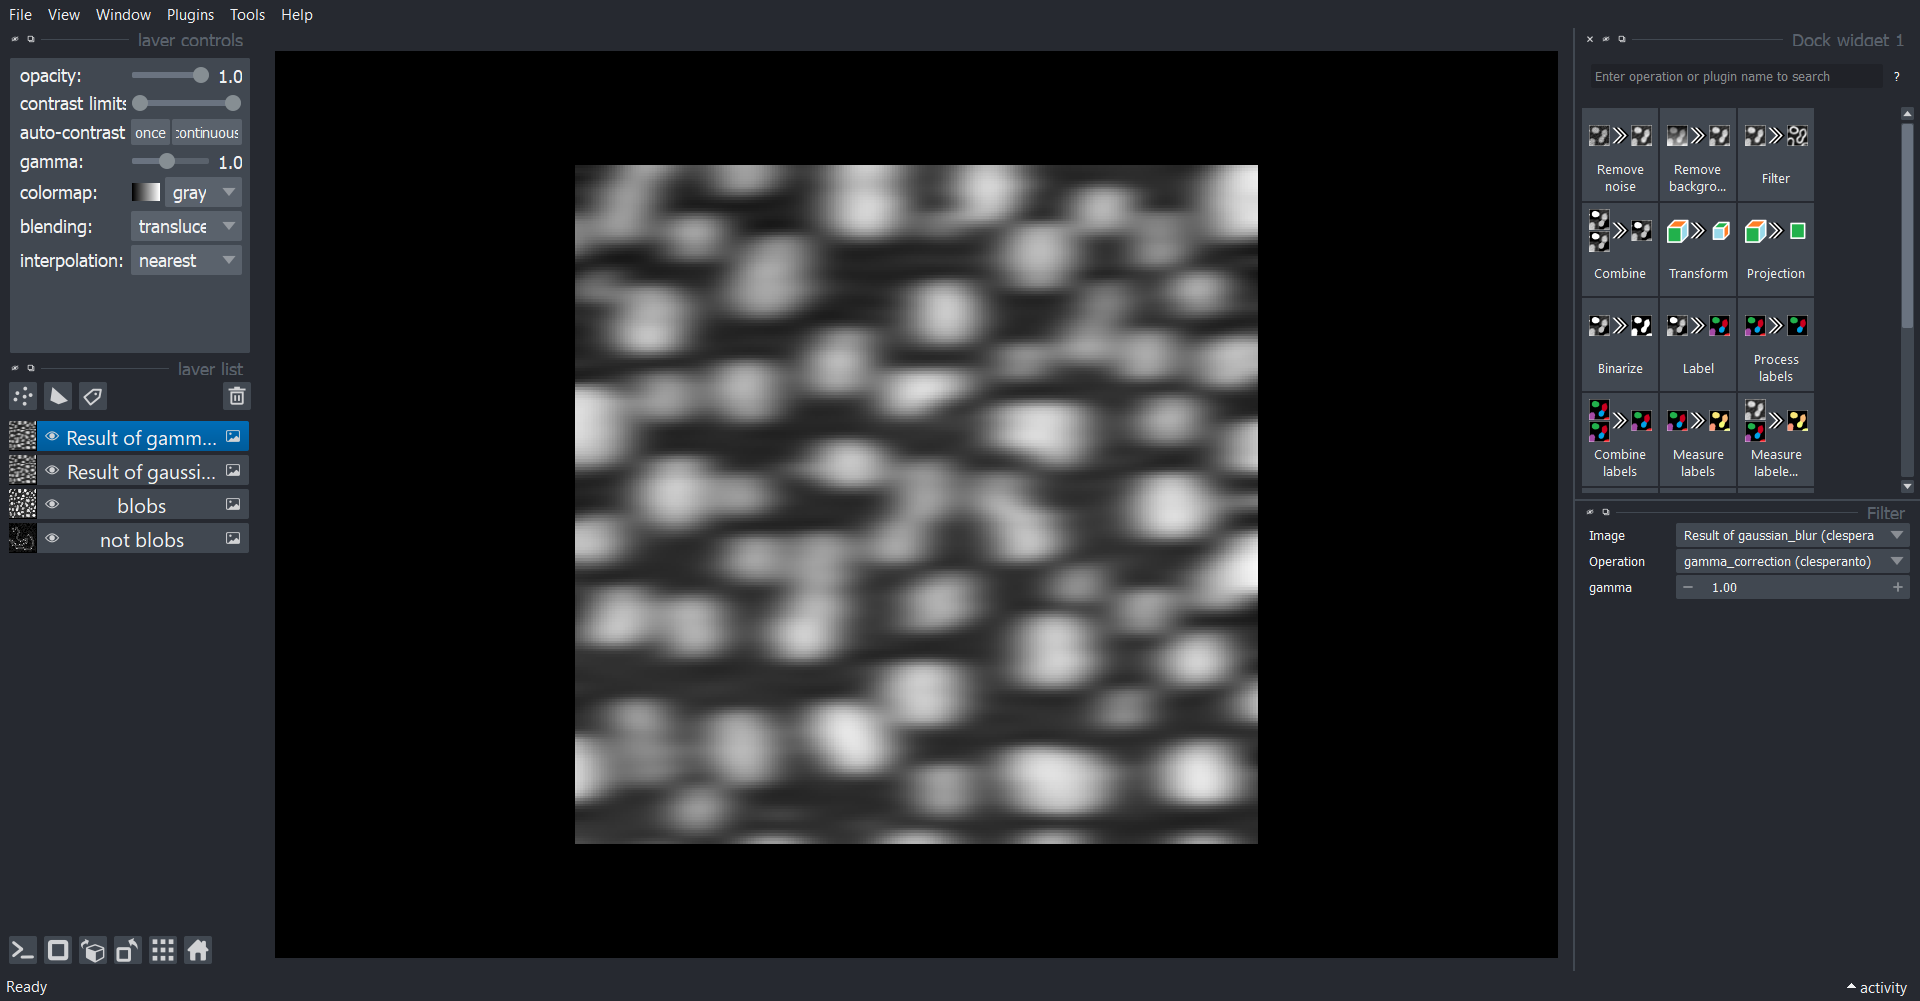

In [10]:
napari.utils.nbscreenshot(viewer)

In [11]:
controller.redo_stack

In [12]:
assistant.redo_action()
print('CURRENT WORKFLOW:')
print(manager.workflow)

2022-05-10 11:15:53.778 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 9.0, 1.0, 0.0)
2022-05-10 11:15:53.797 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)


CURRENT WORKFLOW:
Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 9.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [13]:
for i in controller.undo_stack:
    print(i)

Workflow:

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 1.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 4.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)

Workflow:
Result of gaussian_blur (clesperanto) <- (<function gaussian_blur at 0x00000184D2FCE700>, 'blobs', None, 8.0, 1.0, 0.0)
Result of gamma_correction (clesperanto) <- (<function gamma_correction at 0x00000184D3047700>, 'Result of gaussian_blur (clesperanto)', None, 1.0)



In [14]:
controller.redo_stack

[]

In [15]:
widgets_dict = {
    key:assistant._layers[viewer.layers[key]][1] 
    for key in manager.workflow._tasks.keys()
}

In [16]:
gamma = widgets_dict['Result of gamma_correction (clesperanto)']

In [17]:
from napari_assistant._gui._category_widget import OP_NAME_PARAM
gamma[OP_NAME_PARAM]

In [18]:
set(manager.workflow._tasks.keys()) == set(manager.workflow._tasks.keys())

True

2022-05-10 11:17:08.590 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 8.0, 1.0, 0.0)
2022-05-10 11:17:08.607 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)
2022-05-10 11:17:10.643 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 4.0, 1.0, 0.0)
2022-05-10 11:17:10.659 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)
2022-05-10 11:17:12.974 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gaussian_blur (clesperanto)(..., 1.0, 1.0, 0.0)
2022-05-10 11:17:12.990 | INFO     | napari_assistant._gui._category_widget:call_op:171 - gamma_correction (clesperanto)(..., 1.0)
